#### IBM 데이터에서 누락 된 값들
* 연령
* 위치

####  인구통계
* CustomerID: 각 고객을 식별하는 고유 ID입니다.
* 성별: 고객의 성별: 남성, 여성
* 연령: 회계 분기가 종료된 시점의 고객의 현재 연령(년)입니다.
* 고령자: 고객이 65세 이상인지 여부를 나타냅니다. 예, 아니오
* 기혼: 고객이 기혼 여부를 나타냅니다. 예, 아니오
* 부양 가족: 고객이 부양 가족과 함께 살고 있는지 여부를 나타냅니다. 예, 아니오. 부양 가족은 자녀, 부모, 조부모 등이 될 수 있습니다.
* 부양가족 수: 고객과 함께 거주하는 부양가족 수를 나타냅니다.

#### 서비스
* 분기: 데이터가 파생된 회계 분기(예: Q3).
* 친구 추천: 고객이 친구나 가족을 이 회사에 추천한 적이 있는지 나타냅니다. 예, 아니요
* 추천 수: 현재까지 고객이 작성한 추천 수를 나타냅니다.
* 기간(개월): 위에 지정된 분기 말까지 고객이 회사에 있었던 총 개월 수를 나타냅니다.
* 제안: 해당하는 경우 고객이 수락한 마지막 마케팅 제안을 식별합니다. 값에는 없음, 제안 A, 제안 B, 제안 C, 제안 D 및 제안 E가 있습니다.
* 전화 서비스: 고객이 회사의 집 전화 서비스에 가입했는지 여부를 나타냅니다. 예, 아니오
* 평균 월간 장거리 요금: 위에 지정된 분기 말까지 계산된 고객의 평균 장거리 요금을 나타냅니다.
* 여러 회선: 고객이 회사의 여러 전화 회선에 가입했는지 여부를 나타냅니다. 예, 아니오
* 인터넷 서비스: 고객이 회사의 인터넷 서비스에 가입했는지 여부를 나타냅니다. 아니오, DSL, 광섬유, 케이블.
* 평균 월간 다운로드(GB): 위에 지정된 분기 말까지 계산된 고객의 평균 다운로드 볼륨(GB)을 나타냅니다.
* 온라인 보안: 고객이 회사에서 제공하는 추가 온라인 보안 서비스에 가입했는지 여부를 나타냅니다. 예, 아니오
* 온라인 백업: 고객이 회사에서 제공하는 추가 온라인 백업 서비스에 가입했는지 여부를 나타냅니다. 예, 아니오
* 장치 보호 계획: 고객이 회사에서 제공하는 인터넷 장비에 대한 추가 장치 보호 계획에 가입했는지 여부를 나타냅니다. 예, 아니요
* 프리미엄 기술 지원: 고객이 대기 시간이 단축된 회사의 추가 기술 지원 계획에 가입했는지 여부를 나타냅니다. 예, 아니오
* 스트리밍 TV: 고객이 인터넷 서비스를 사용하여 제3자 제공자의 텔레비전 프로그램을 스트리밍 하는지 여부를 나타냅니다. 예, 아니요. 회사는 이 서비스에 대해 추가 요금을 부과하지 않습니다.
* 영화 스트리밍: 고객이 인터넷 서비스를 사용하여 타사 공급자의 영화를 스트리밍 하는지 여부를 나타냅니다. 예, 아니요. 회사는 이 서비스에 대해 추가 요금을 부과하지 않습니다.
* 음악 스트리밍: 고객이 인터넷 서비스를 사용하여 제3자 제공업체의 음악을 스트리밍 하는지 여부를 나타냅니다. 예, 아니요. 회사는 이 서비스에 대해 추가 요금을 부과하지 않습니다.
* 데이터 무제한: 고객이 데이터 무제한 다운로드/업로드를 위해 추가 월별 요금을 지불했는지 여부를 나타냅니다. 예, 아니요
* 계약: 고객의 현재 계약 유형(월간, 1년, 2년)을 나타냅니다.
* 종이 없는 청구: 고객이 종이 없는 청구를 선택했는지 나타냅니다. 예, 아니요
* 지불 방법: 고객이 청구서를 지불하는 방법을 나타냅니다: 은행 인출, 신용 카드, 우편 수표
* 월별 요금: 회사에서 제공하는 모든 서비스에 대한 고객의 현재 월별 총 요금을 나타냅니다.
* 총 요금: 위에 지정된 분기 말까지 계산된 고객의 총 요금을 나타냅니다.
* 총 환불액: 위에 지정된 분기 말까지 계산된 고객의 총 환불액을 나타냅니다.
* 총 추가 데이터 요금: 위에 지정된 분기 말까지 계획에 지정된 것 이상의 추가 데이터 다운로드에 대한 고객의 총 요금을 나타냅니다.
* 총 장거리 요금: 위에 지정된 분기 말까지 요금제에 지정된 요금을 초과하는 장거리 요금에 대한 고객의 총 요금을 나타냅니다.

 

#### 상태
* 분기: 데이터가 파생된 회계 분기(예: Q3).
* 만족도 점수: 회사에 대한 고객의 전반적인 만족도 1(매우 불만족)에서 5(매우 만족)까지입니다.
* 만족도 점수 레이블: 점수(1-5)의 텍스트 버전을 텍스트 문자열로 나타냅니다.
* 고객 상태: 분기 말 고객의 상태를 나타냅니다. 이탈, 유지 또는 참여
* Churn Label: 예 = 고객이 이번 분기에 회사를 떠났습니다. 아니오 = 고객이 회사에 남아 있었습니다. 이탈 가치와 직접적인 관련이 있습니다.
* 이탈 값: 1 = 고객이 이번 분기에 회사를 떠났습니다. 0 = 고객이 회사에 남아 있습니다. Churn Label과 직접적인 관련이 있습니다.
* 이탈 점수: 예측 도구 IBM SPSS Modeler를 사용하여 계산되는 0-100의 값입니다. 이 모델은 이탈을 유발하는 것으로 알려진 여러 요인을 통합합니다. 점수가 높을수록 고객이 이탈할 가능성이 높아집니다.
* 이탈 점수 범주: 이탈 점수를 다음 범주 중 하나에 할당하는 계산: 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81-90 및 91-100
* CLTV: 고객 평생 가치. 예측된 CLTV는 기업 공식과 기존 데이터를 사용하여 계산됩니다. 가치가 높을수록 고객의 가치가 높아집니다. 가치가 높은 고객은 이탈 여부를 모니터링해야 합니다.
* CLTV 범주: CLTV 값을 다음 범주 중 하나에 할당하는 계산: 2000-2500, 2501-3000, 3001-3500, 3501-4000, 4001-4500, 4501-5000, 5001-5000, 5001-5500 -6500 및 6501-7000.
* 이탈 범주: 고객 이탈 이유에 대한 상위 레벨 범주: 태도, 경쟁자, 불만족, 기타, 가격. 회사를 떠날 때 모든 고객은 회사를 떠나는 이유를 묻습니다. 이탈 이유와 직접적인 관련이 있습니다.
* 이탈 사유: 고객이 회사를 떠나는 구체적인 이유입니다. 이탈 카테고리와 직접적인 관련이 있습니다.

* IBM sample datasets
    * https://www.kaggle.com/blastchar/telco-customer-churn
    * https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113
* Demographic info: 
    * Gender, SeniorCitizen, Partner, Dependents
* Services subscribed: 
    * PhoneService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
* Customer account info:
    * CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

## load dataset

In [3]:
df = pd.read_csv("data/telco.csv")
df.shape

(7043, 21)

In [4]:
pd.options.display.max_columns = 22

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### describe

In [10]:
# describe 로 미리보기 합니다.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
# describe 로 object 데이터를 미리보기 합니다.
df.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### 수치형 데이터 시각화

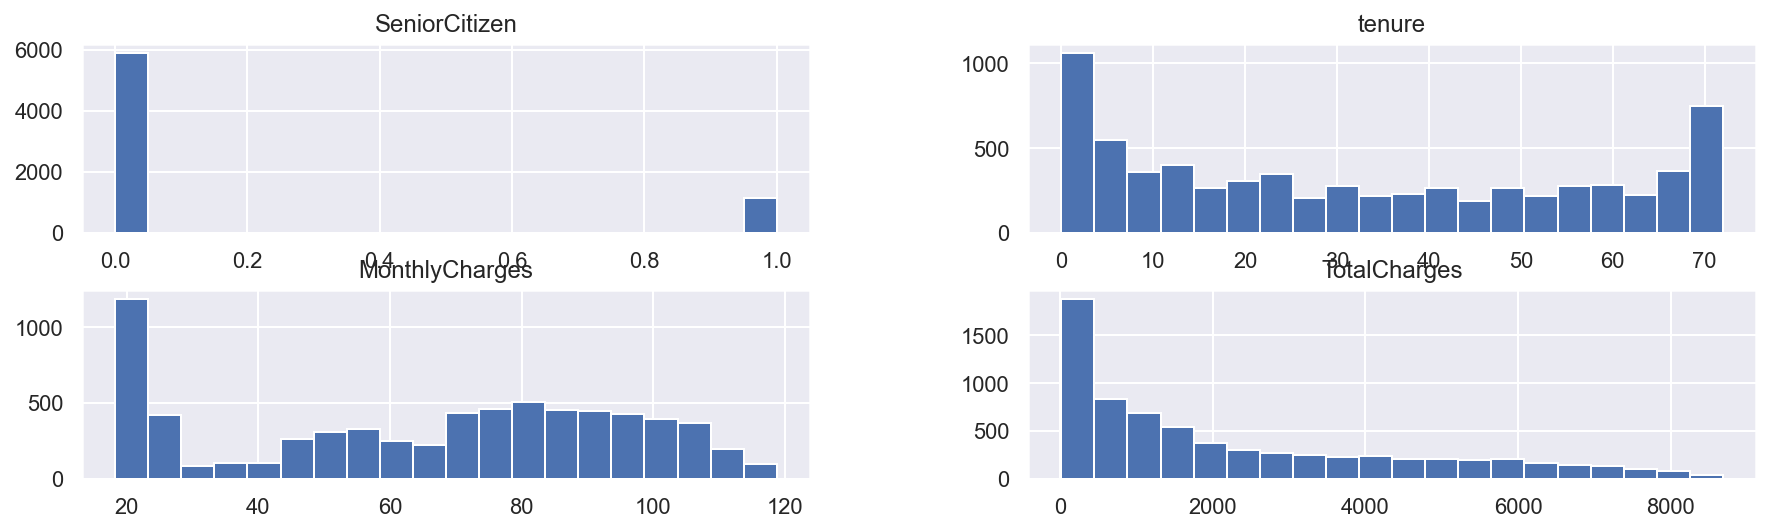

In [12]:
# pandas 의 hist 를 통해 수치 데이터의 히스토그램을 그립니다.
h = df.hist(bins=20, figsize=(15, 4))

In [13]:
df.shape

(7043, 21)

In [14]:
# 수치형 데이터만 가져와서 시각화를 할 수 있도록 na 값을 제거하고 df_numeric 이라는 변수에 담습니다.
df_numeric = df.select_dtypes(exclude="object").copy()
df_numeric

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [15]:
df_numeric["Churn"] = df["Churn"]
df_numeric = df_numeric.dropna()
df_numeric.shape

(7032, 5)

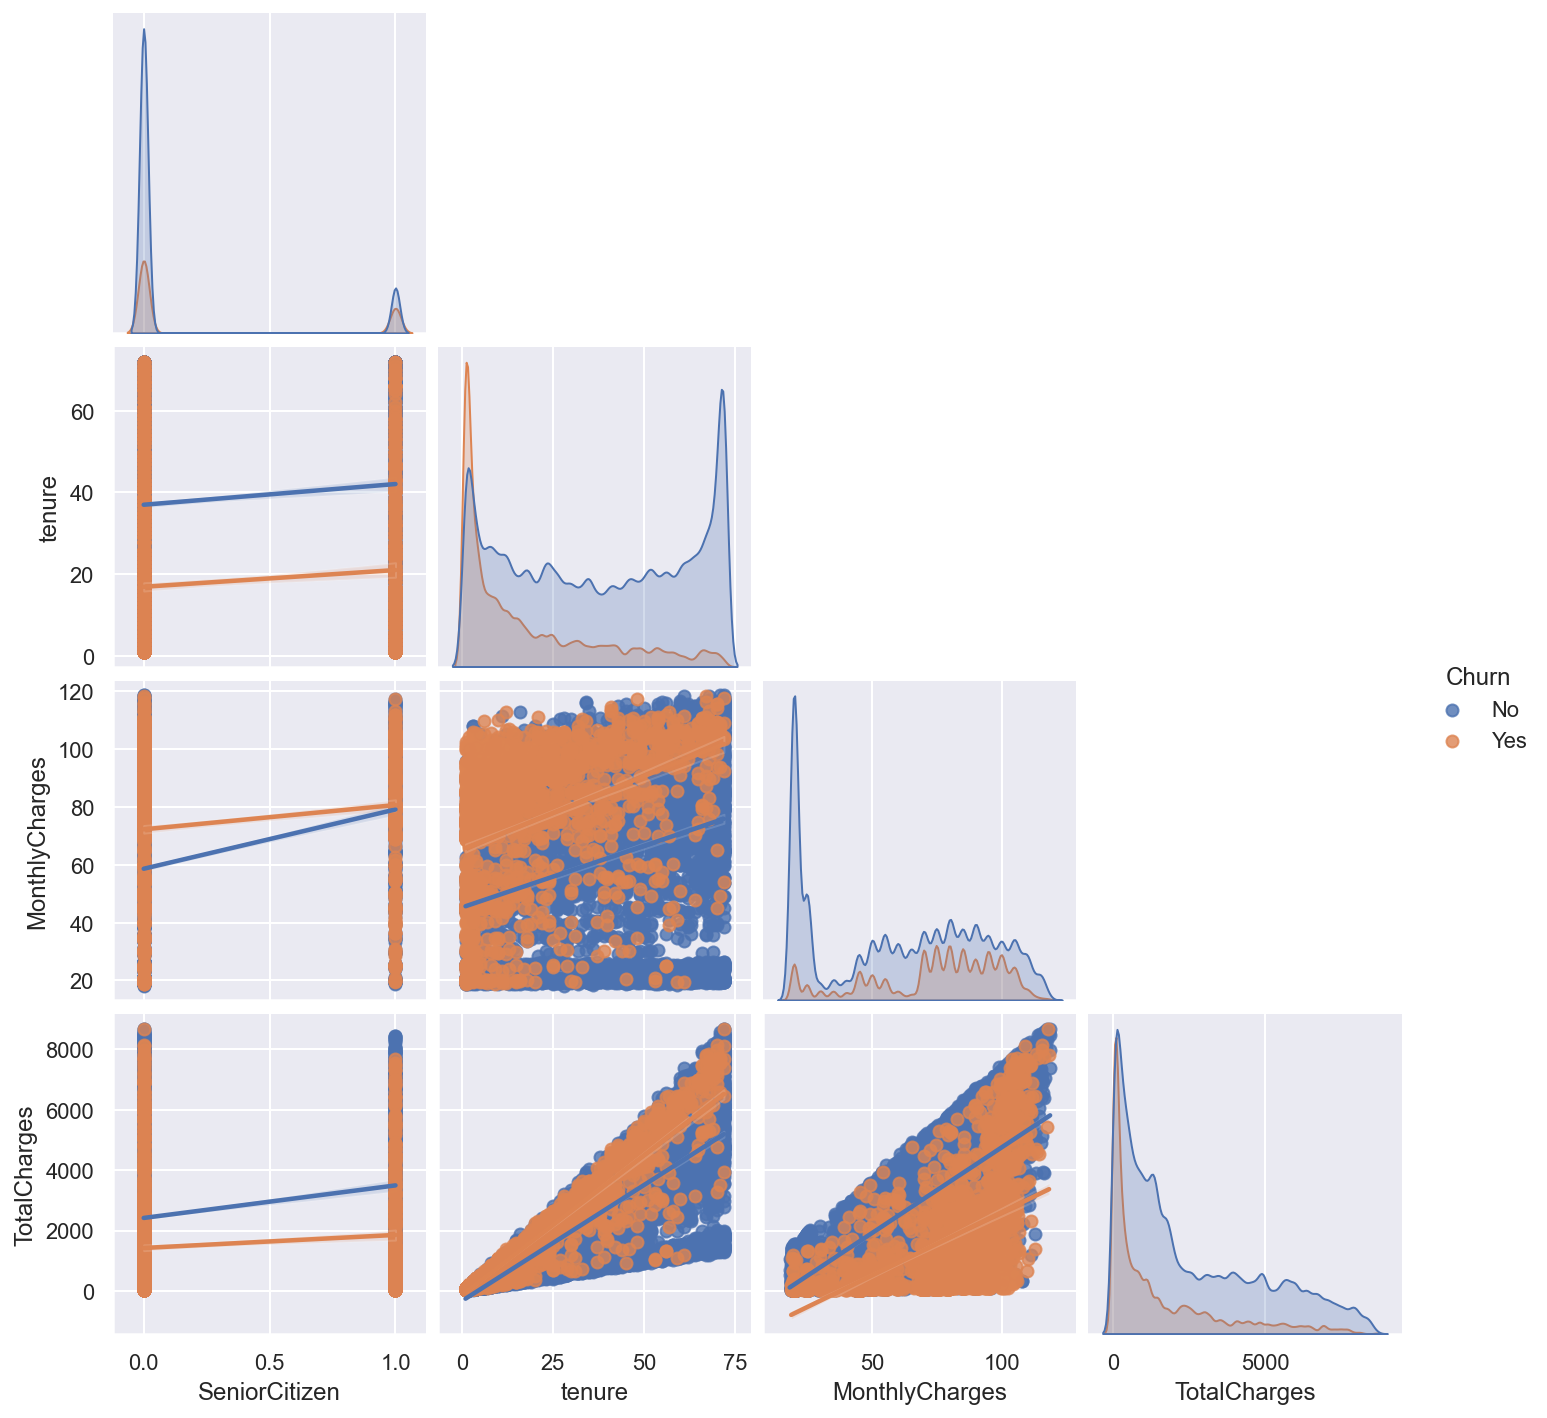

In [55]:
# pairplot 을 그립니다.
# bw에 대해 경고 메시지가 뜬다면 다음 옵션을 사용합니다.
sns.pairplot(df_numeric, hue="Churn", kind='reg', diag_kws={"bw_method":.05}, corner=True)

### 범주형 데이터 시각화

In [17]:
nunique = df.nunique()
nunique

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [18]:
category_col = nunique[nunique < 10]
category_col

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [19]:
bi_category = nunique[nunique < 3]
bi_cols = bi_category.index.tolist()
bi_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

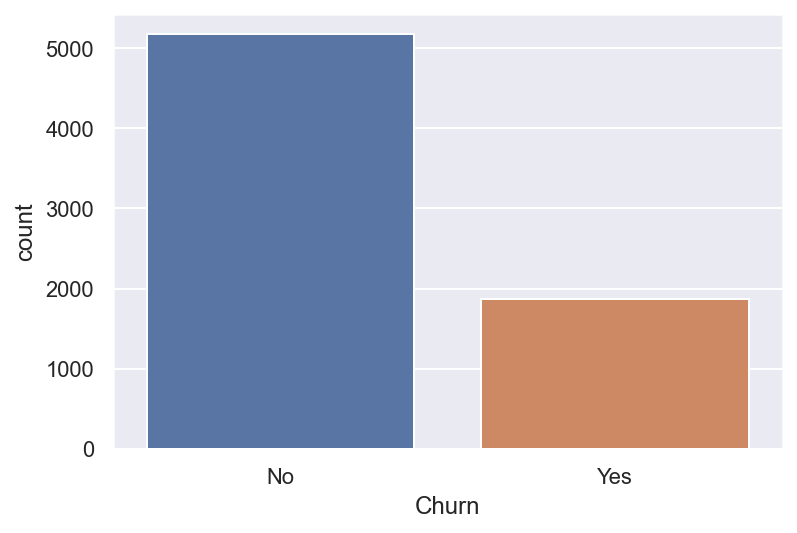

In [20]:
sns.countplot(data=df, x="Churn")

## 두 개의 범주형 변수 시각화

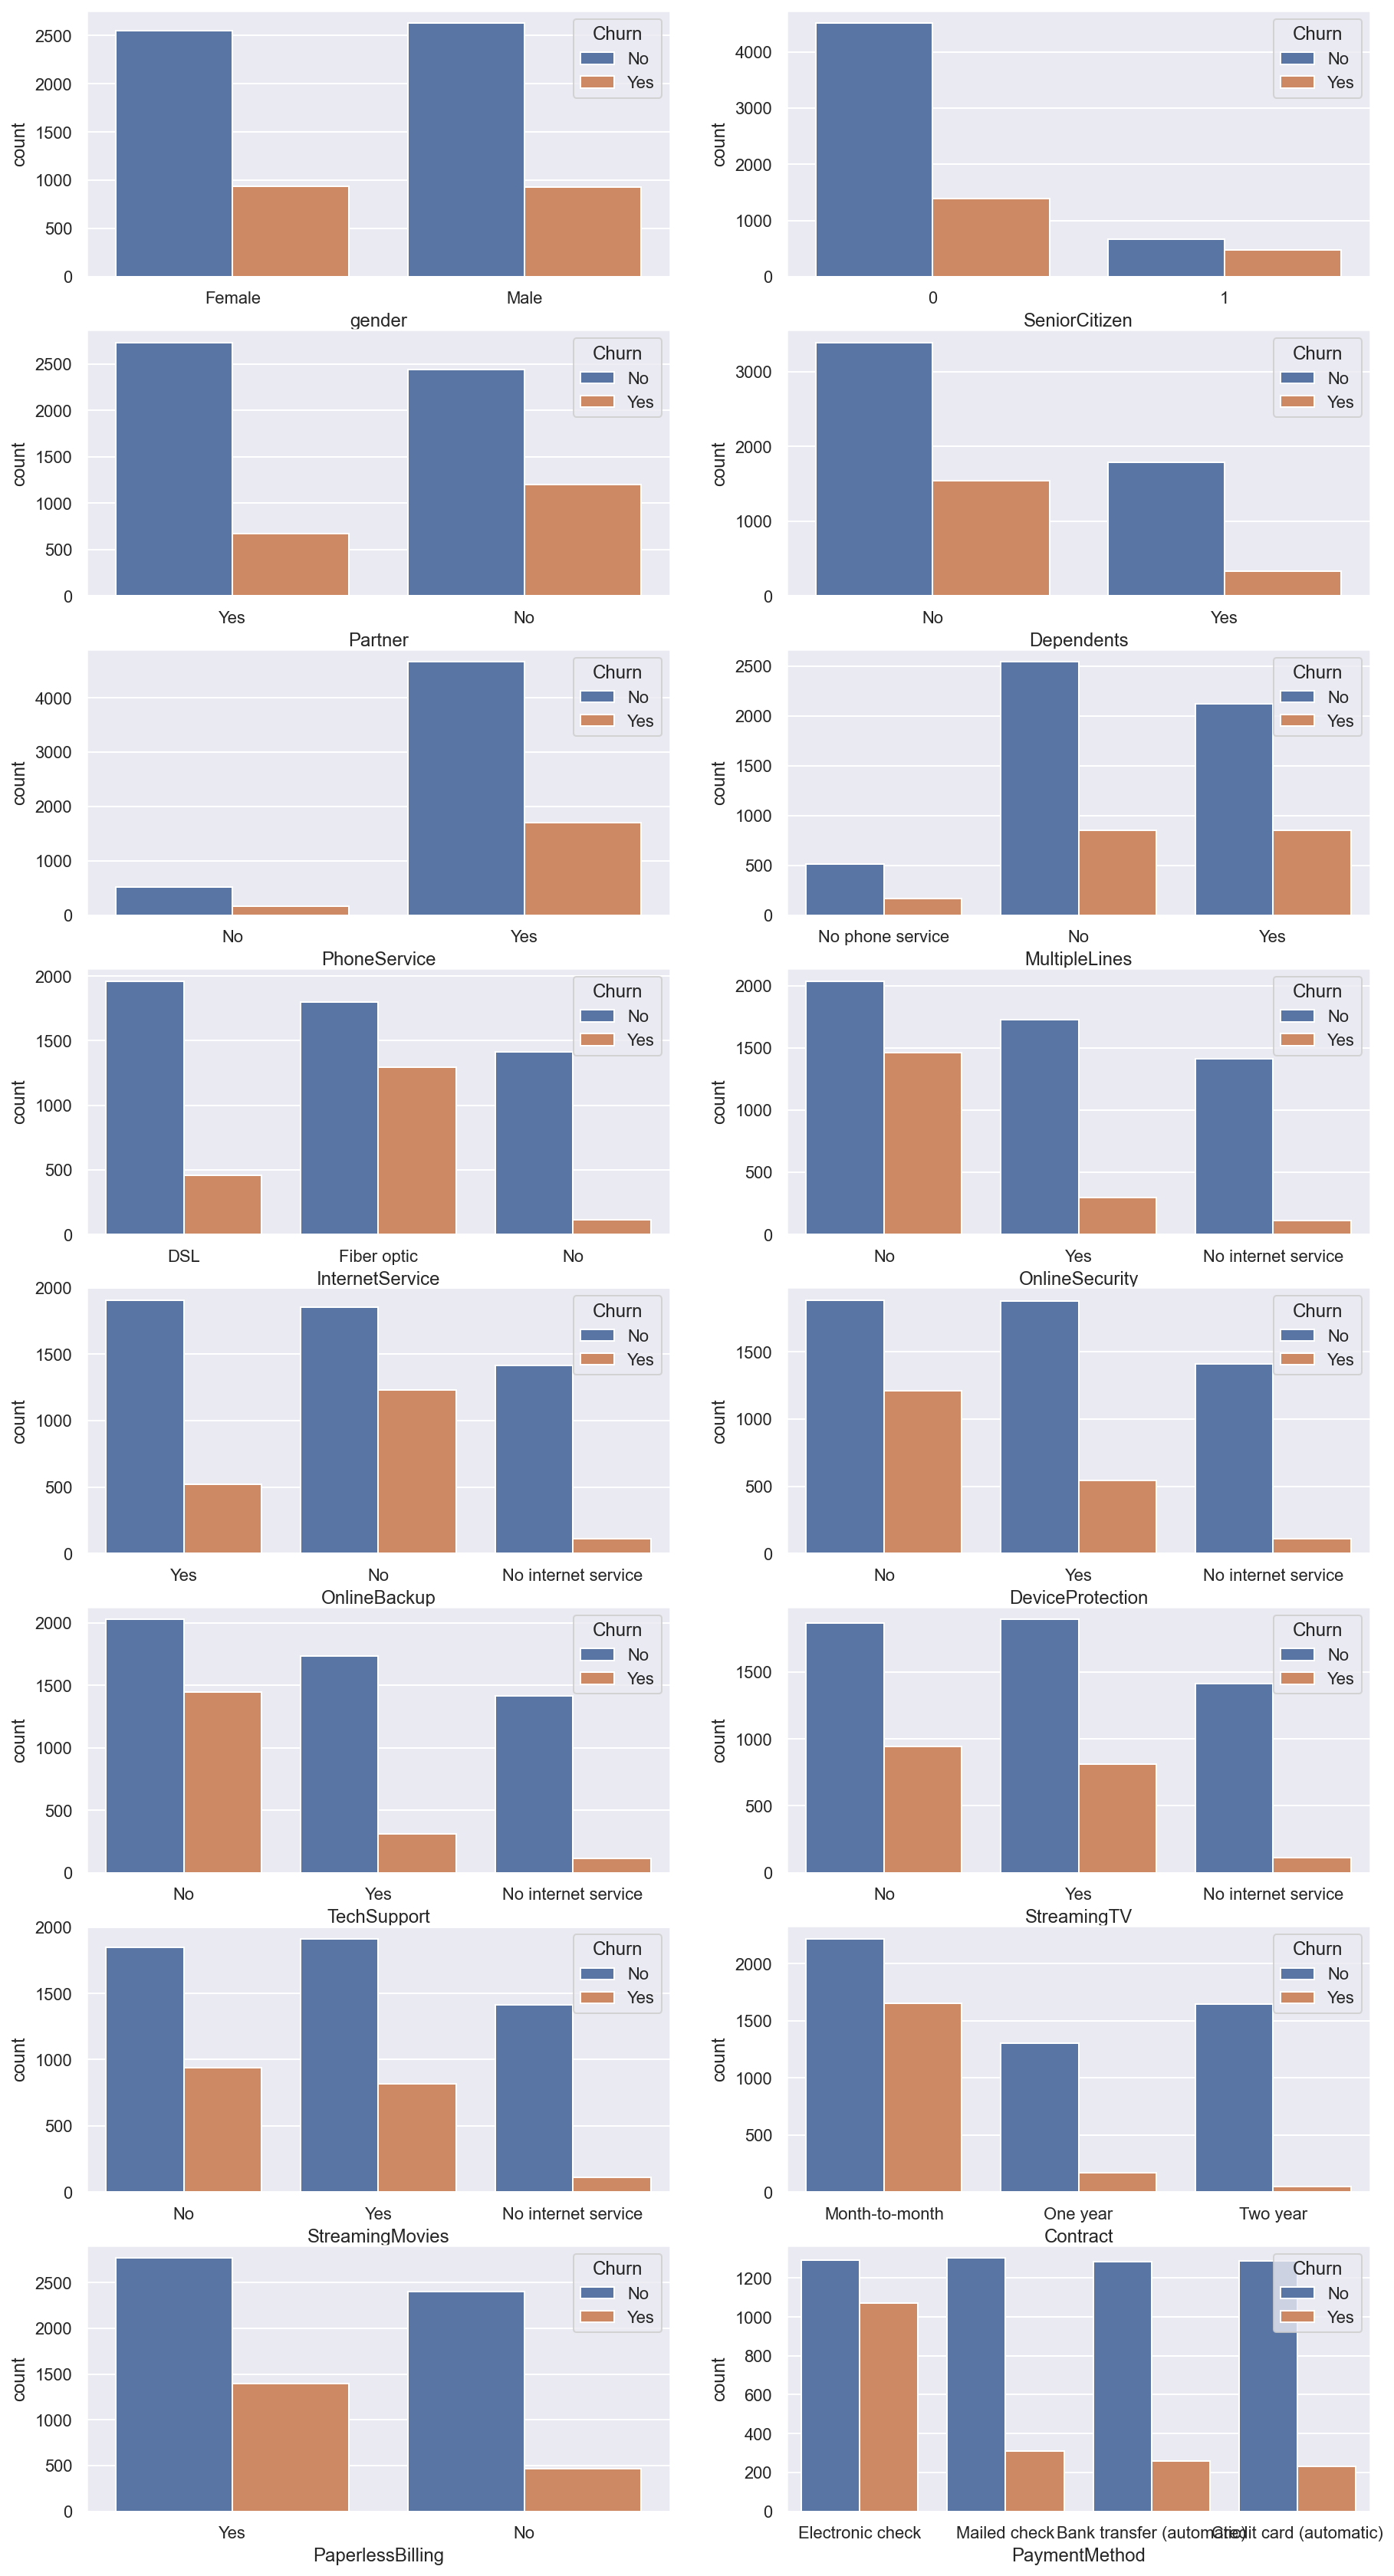

In [21]:
category_col_name = category_col.index.tolist()
col_len = len(category_col_name)

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 30))
for i, cat_col in enumerate(category_col_name[:-1]):
    row = i // 2
    col = i % 2
#     print(row, col)
    sns.countplot(data=df, x=cat_col, hue="Churn", ax=axes[row, col])

In [22]:
df[bi_cols].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,Female,0,Yes,No,No,Yes,No
1,Male,0,No,No,Yes,No,No
2,Male,0,No,No,Yes,Yes,Yes
3,Male,0,No,No,No,No,No
4,Female,0,No,No,Yes,Yes,Yes


### 바이너리 변수에 대한 인코딩

In [23]:
# gender, Partner, Dependents, PhoneService, PaperlessBilling, Churn

df["gender_bool"] = (df["gender"] == "Male")
df["Partner_bool"] = (df["Partner"] == "Yes")
df["Dependents_bool"] = (df["Dependents"] == "Yes")
df["PhoneService_bool"] = (df["PhoneService"] == "Yes")
df["PaperlessBilling_bool"] = (df["PaperlessBilling"] == "Yes")
df["Churn_bool"] = (df["Churn"] == "Yes")

In [24]:
bi_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [25]:
df[["gender_bool", "Partner_bool"]].head()

,gender_bool,Partner_bool
0,False,True
1,True,False
2,True,False
3,True,False
4,False,False


In [26]:
corr = df.corr()

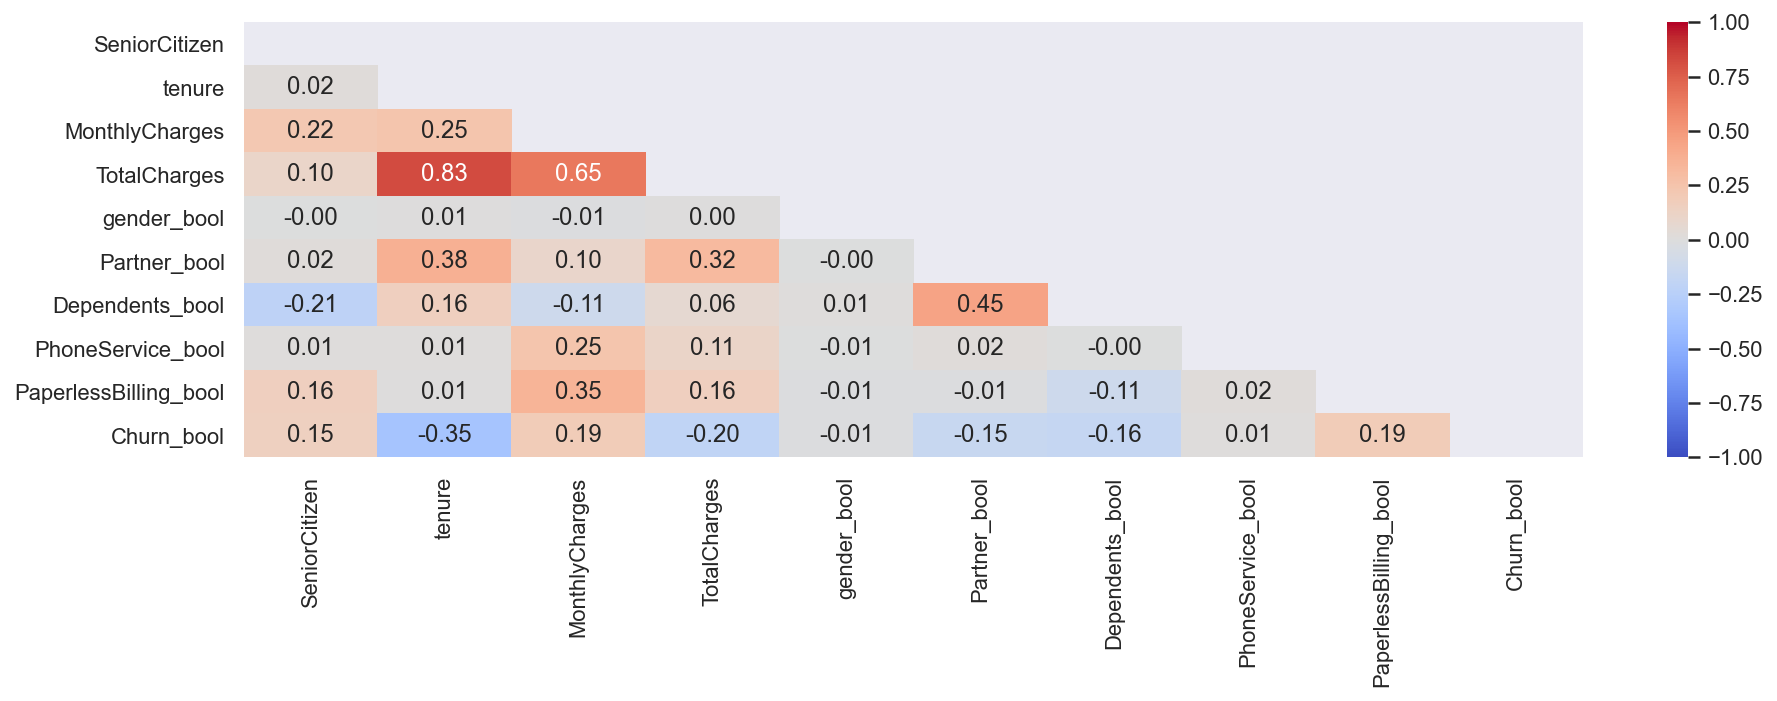

In [27]:
# 수치변수에 대한 상관계수 구해서 그리기
# corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(15, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, mask=mask)

### 수치형 변수

In [28]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [29]:
cat_cols = nunique[( nunique > 2 ) & ( nunique < 10 )]
cat_cols = cat_cols.index.tolist()
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [30]:
df["Churn"]

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [31]:
df.groupby("Churn")[bi_cols].mean()

,SeniorCitizen
Churn,
No,0.128721
Yes,0.254682


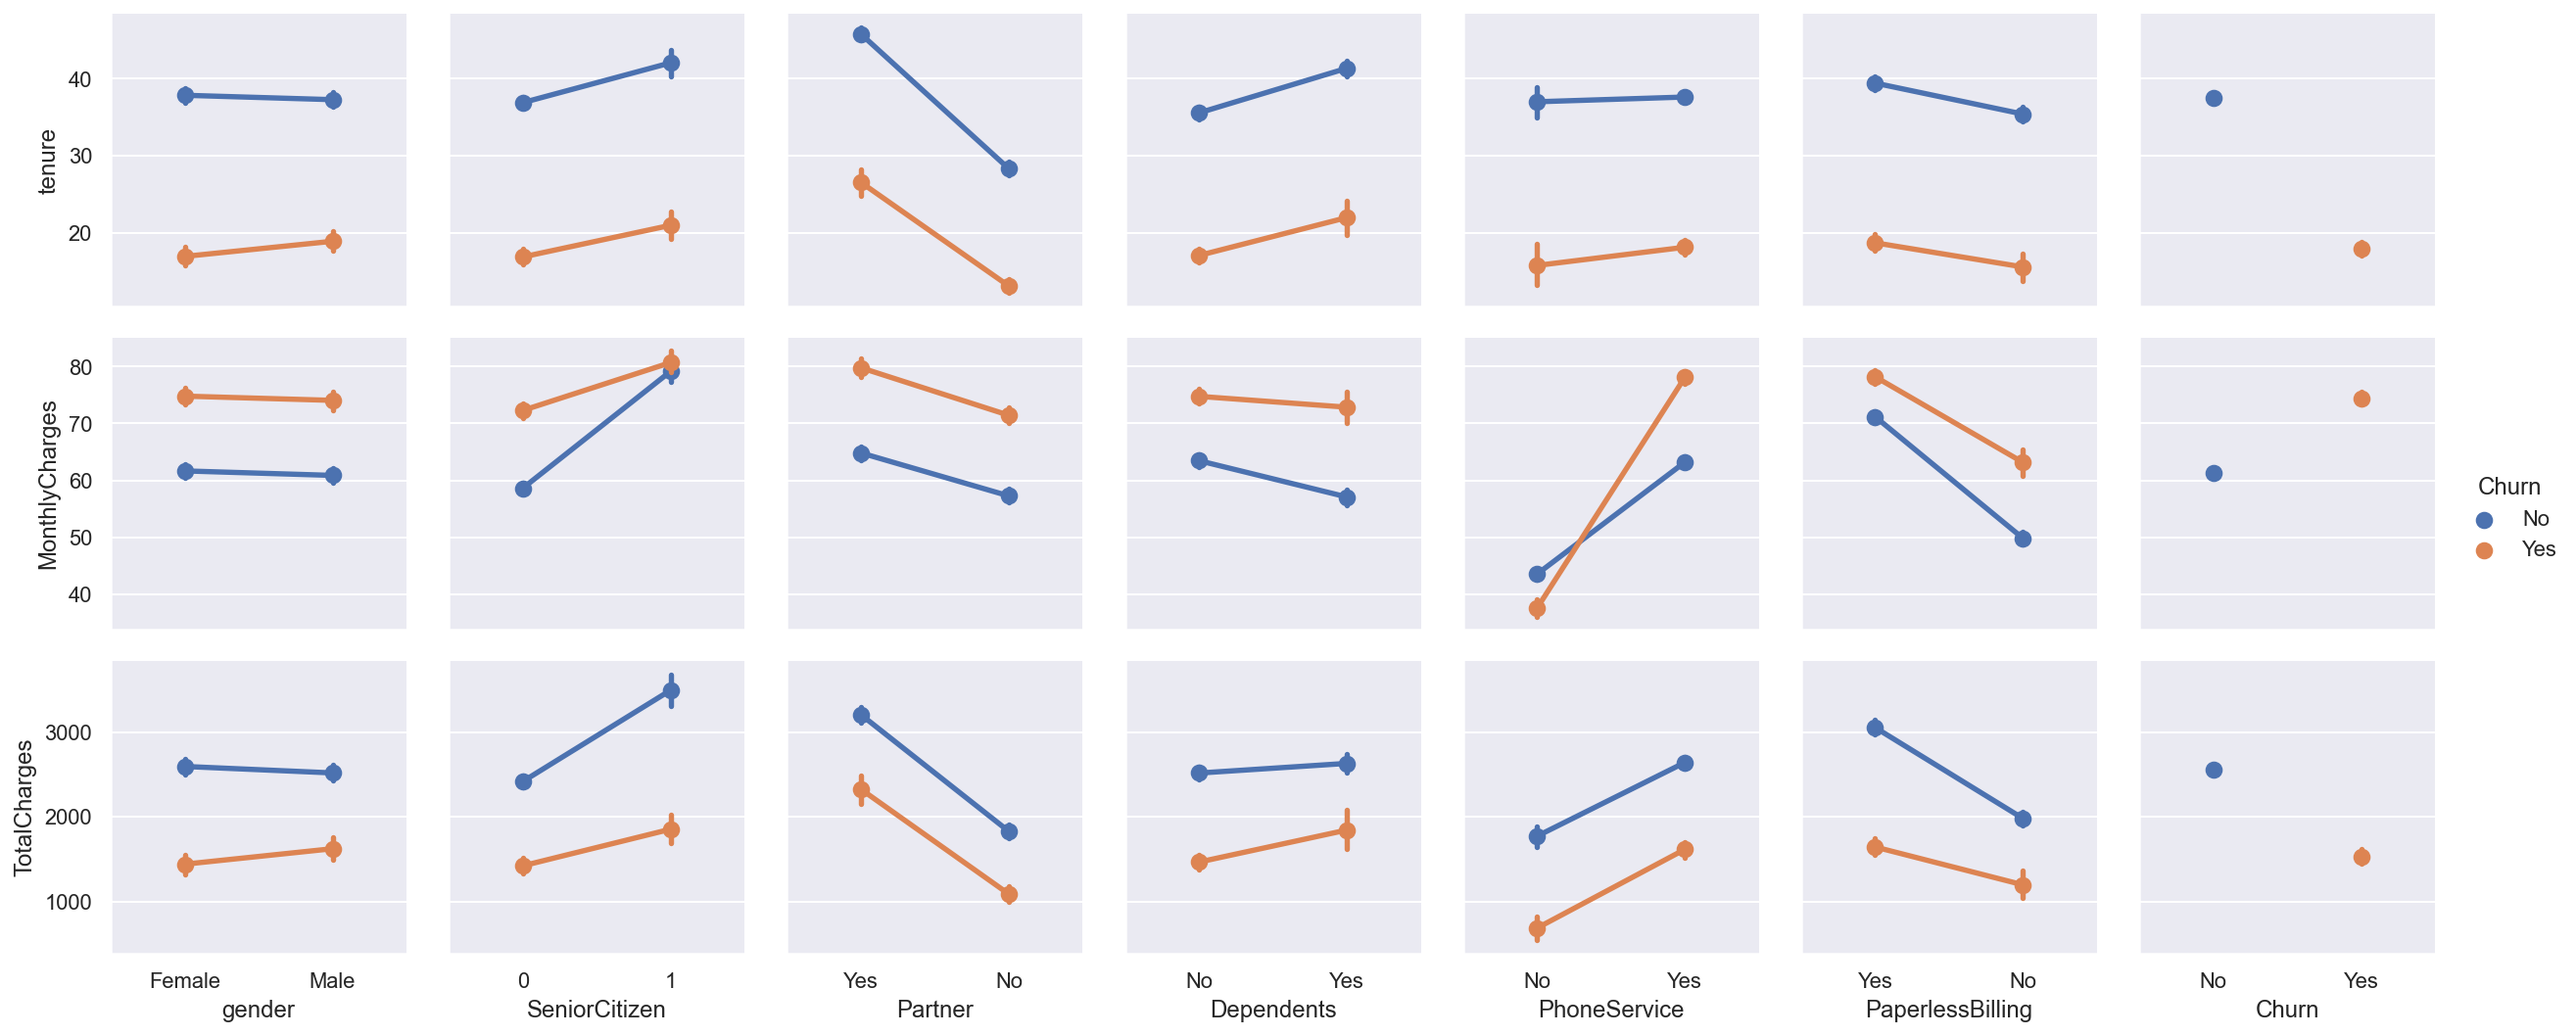

In [32]:
g = sns.PairGrid(data=df, x_vars=bi_cols, y_vars=num_cols, hue="Churn")
g.map(sns.pointplot)
g.add_legend()

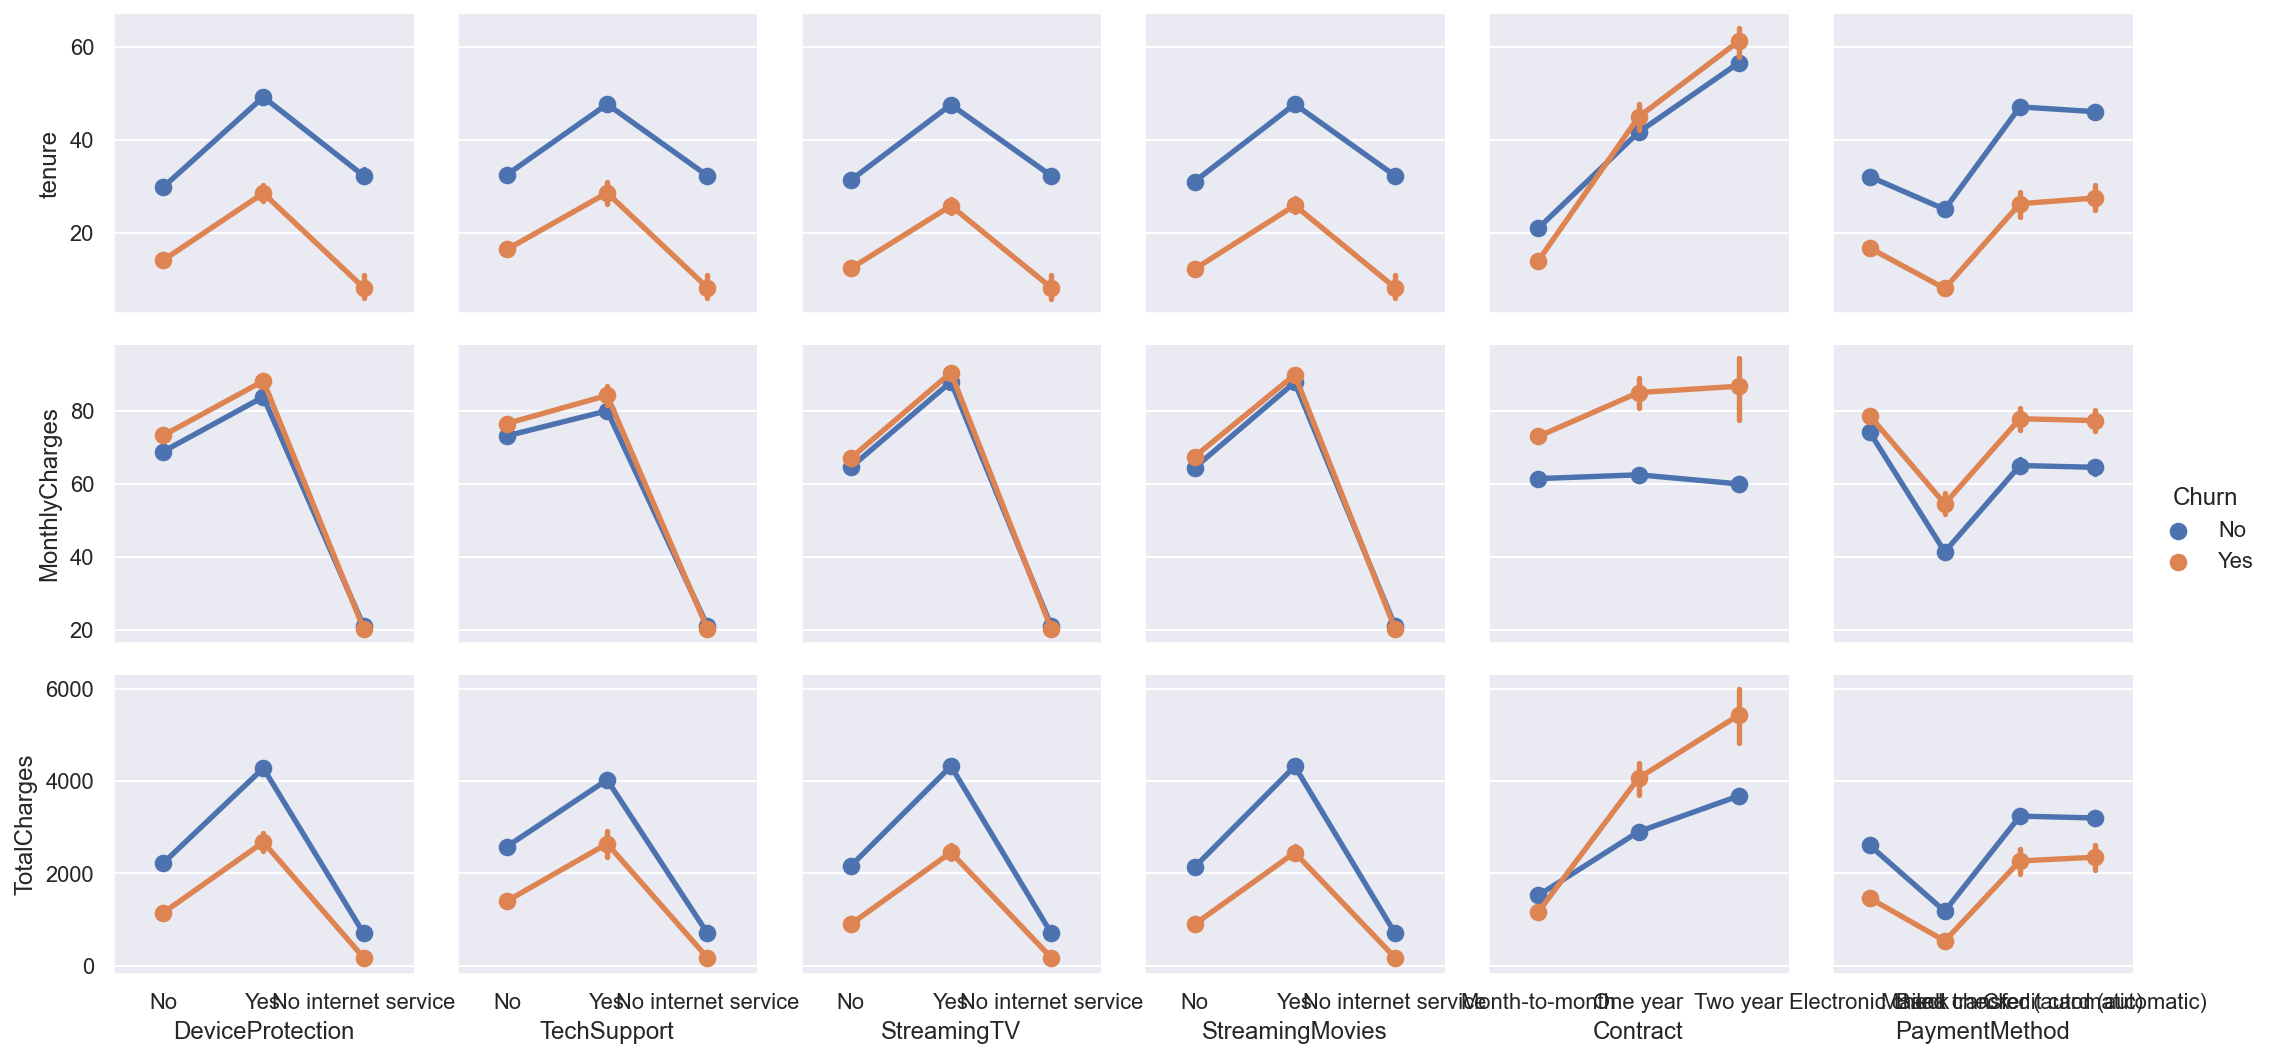

In [33]:
g = sns.PairGrid(data=df, x_vars=cat_cols[4:], y_vars=num_cols, hue="Churn")
g.map(sns.pointplot)
g.add_legend()

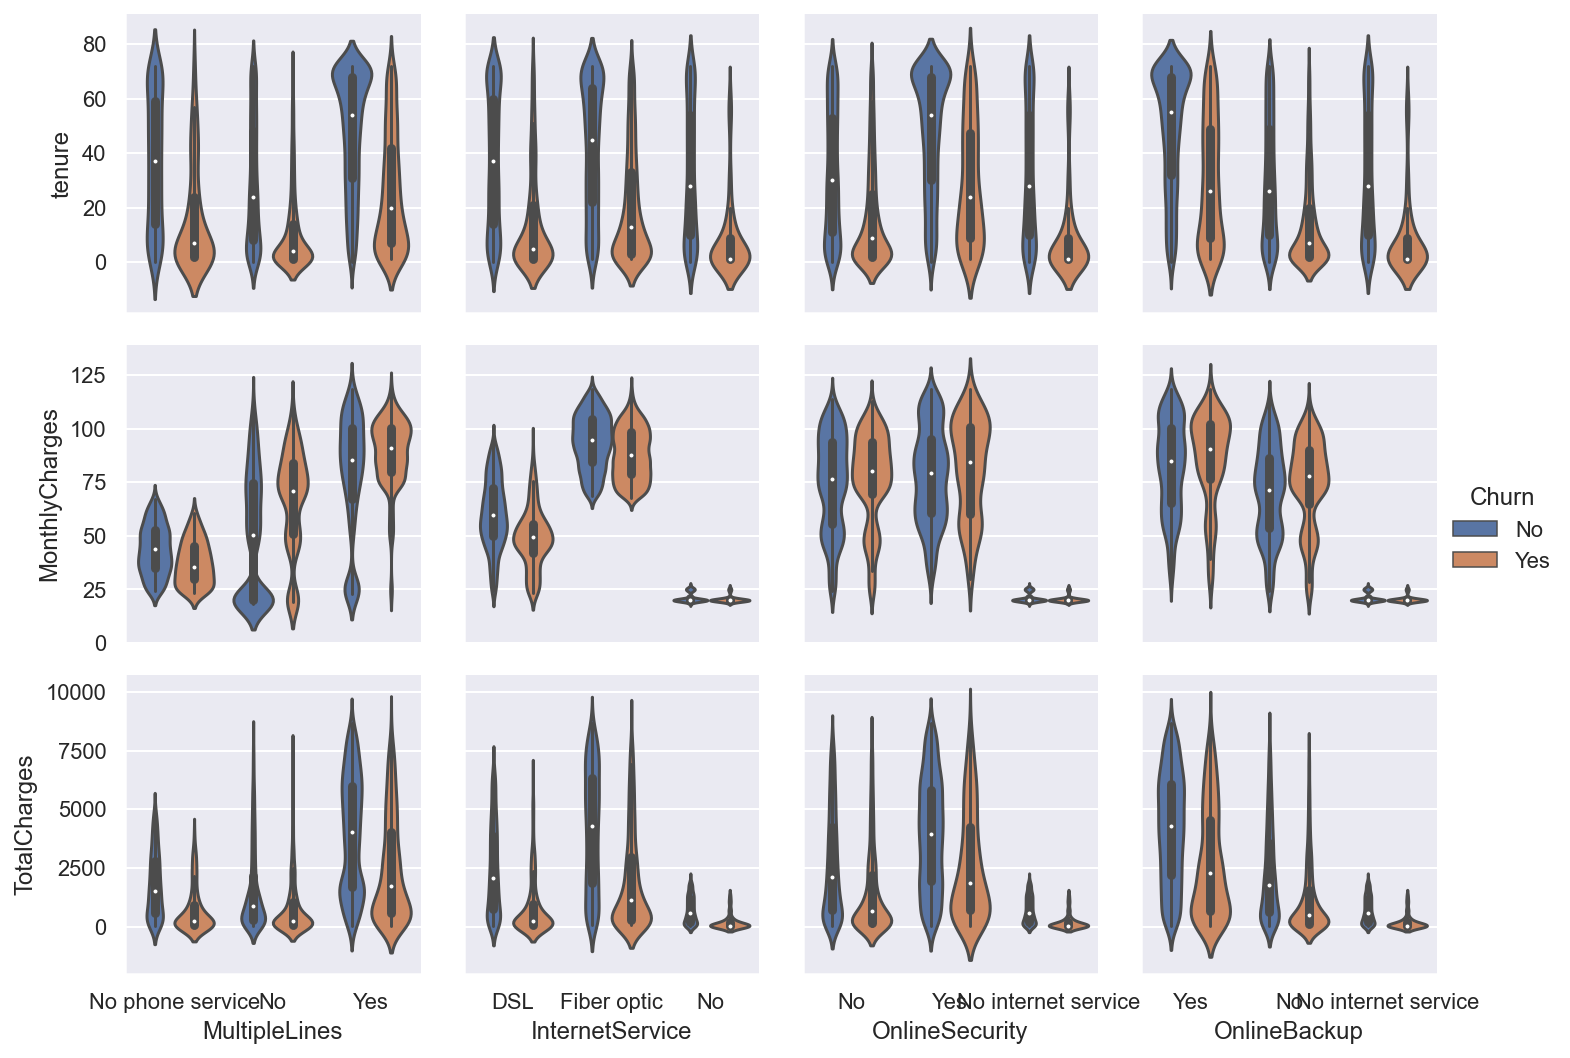

In [34]:
g = sns.PairGrid(data=df, x_vars=cat_cols[:4], y_vars=num_cols, hue="Churn")
g.map(sns.violinplot)
g.add_legend()

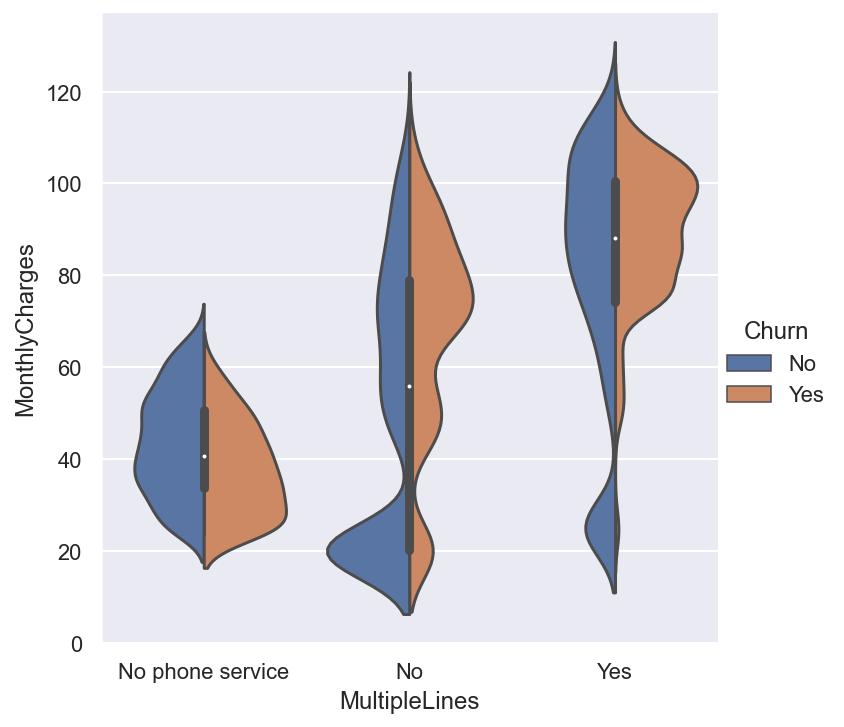

In [35]:
sns.catplot(data=df, x="MultipleLines", y="MonthlyCharges", hue="Churn", 
            kind="violin", split=True)

### binning

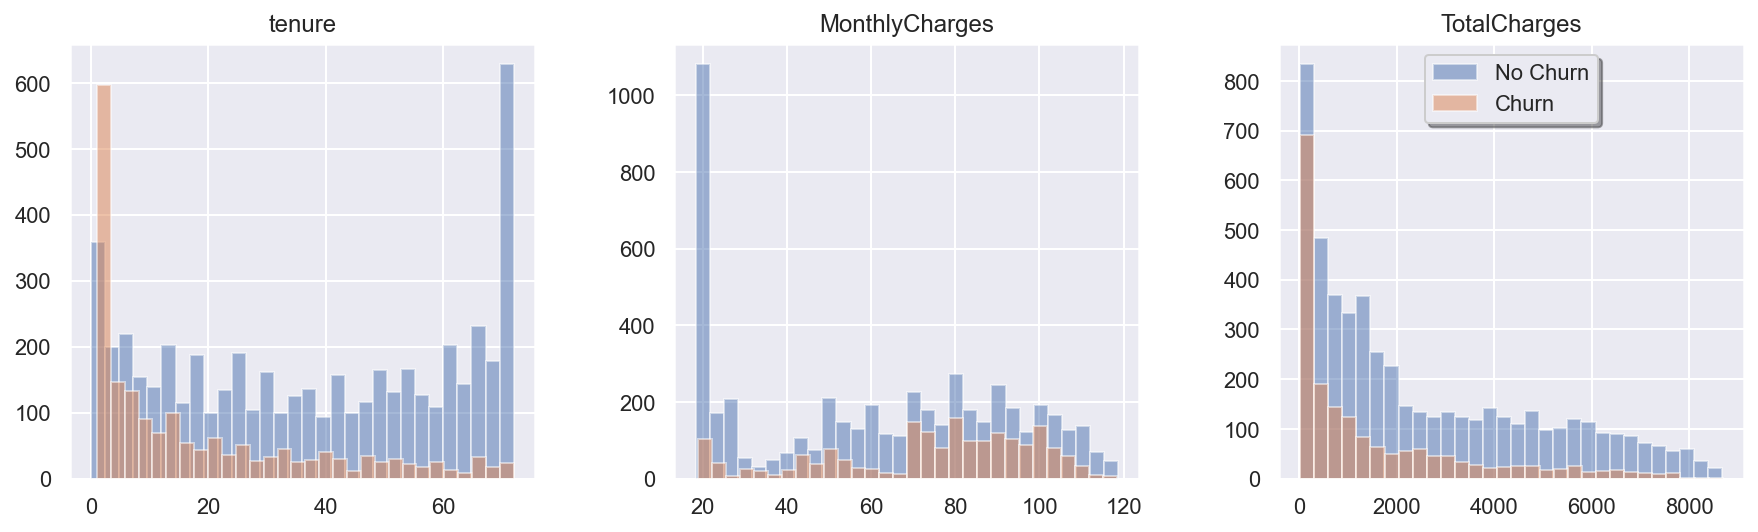

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
df.loc[df["Churn_bool"] == False, num_cols].hist(bins=30, alpha=.5, ax=axes)
df.loc[df["Churn_bool"] == True, num_cols].hist(bins=30, alpha=.5, ax=axes)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=9)

In [37]:
## MonthlyCharges 를 qcut을 통해 나눕니다.
pd.qcut(df["MonthlyCharges"], q=4, labels=["<35", "<70", "<89", "<119"])

0        <35
1        <70
2        <70
3        <70
4        <89
        ... 
7038     <89
7039    <119
7040     <35
7041     <89
7042    <119
Name: MonthlyCharges, Length: 7043, dtype: category
Categories (4, object): ['<35' < '<70' < '<89' < '<119']

In [38]:
# monthlycharges_split 을 30, 70, 100  범위로 나눕니다.
def monthlycharges_split(df) :   
    if df['MonthlyCharges'] <= 30 :
        return '0-30'
    elif (df['MonthlyCharges'] > 30) & (df['MonthlyCharges'] <= 70 ):
        return '30-70'
    elif (df['MonthlyCharges'] > 70) & (df['MonthlyCharges'] <= 99 ):
        return '70-99'
    elif df['MonthlyCharges'] > 99 :
        return '99plus'
    
df['monthlycharges_group'] = df.apply(monthlycharges_split, axis = 1)
df[['MonthlyCharges', 'monthlycharges_group']].head()

,MonthlyCharges,monthlycharges_group
0,29.85,0-30
1,56.95,30-70
2,53.85,30-70
3,42.30,30-70
4,70.70,70-99


In [39]:
# TotalCharges 를 2000, 4000, 6000 으로 나눕니다.
# 아래의 함수를 해당 구간에 따라 나누도록 완성합니다.
def totalcharges_split(df) :   
    if df['TotalCharges'] <= 2000 :
        return '0-2k'
    elif df['TotalCharges'] > 2000 and df["TotalCharges"] <= 4000:
        return '2k-4k'
    elif df['TotalCharges'] > 4000 and df["TotalCharges"] <= 6000:
        return '4k-6k'
    else:
        return '6kplus'
    

df['totalcharges_group'] = df.apply(totalcharges_split, axis = 1)
df[['TotalCharges', 'totalcharges_group']].sample(10)

,TotalCharges,totalcharges_group
1603,994.55,0-2k
5400,2406.10,2k-4k
1936,3145.15,2k-4k
513,5916.95,4k-6k
3688,3990.60,2k-4k
3005,459.95,0-2k
6379,788.80,0-2k
4207,1011.50,0-2k
1134,2070.05,2k-4k
5353,1393.60,0-2k


In [40]:
# tenure 를 20, 40, 60 으로 나눕니다.
def tenure_split(df) : 
    if df["tenure"] <=20:
        return "0-20"
    elif df["tenure"] > 20 and df["tenure"] <= 40:
        return "20-40"
    elif df["tenure"] > 40 and df["tenure"] <= 60:
        return "40-60"
    else:
        return "60plus"
        
        
df['tenure_group'] = df.apply(tenure_split, axis = 1)
df[['tenure', 'tenure_group']].sample(10)

,tenure,tenure_group
6608,22,20-40
4444,3,0-20
1538,8,0-20
3322,9,0-20
611,9,0-20
2230,45,40-60
5782,1,0-20
6709,50,40-60
3346,2,0-20
5932,5,0-20


### One Hot Encoding
* 범주형 데이터 => 수치형 데이터로 변환

In [41]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [42]:
bi_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

## 컬럼명 추출

In [43]:
cols = df.columns.tolist()
cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'gender_bool',
 'Partner_bool',
 'Dependents_bool',
 'PhoneService_bool',
 'PaperlessBilling_bool',
 'Churn_bool',
 'monthlycharges_group',
 'totalcharges_group',
 'tenure_group']

### bool 타입 컬럼

In [44]:
bi_bool_cols = []

for col in bi_cols:
    bi_bool_cols.append(f"{col}_bool")
    print(f"{col}_bool")
    
bi_bool_cols

gender_bool
SeniorCitizen_bool
Partner_bool
Dependents_bool
PhoneService_bool
PaperlessBilling_bool
Churn_bool


['gender_bool',
 'SeniorCitizen_bool',
 'Partner_bool',
 'Dependents_bool',
 'PhoneService_bool',
 'PaperlessBilling_bool',
 'Churn_bool']

### 전체 컬럼에서 범주형 컬럼만 추출

In [45]:
multi_cols = set(cols) - set(bi_cols) - set(num_cols) - set(bi_bool_cols)
multi_cols = list(multi_cols)
multi_cols.remove("customerID")
multi_cols

['OnlineSecurity',
 'tenure_group',
 'OnlineBackup',
 'MultipleLines',
 'monthlycharges_group',
 'StreamingMovies',
 'PaymentMethod',
 'Contract',
 'StreamingTV',
 'totalcharges_group',
 'DeviceProtection',
 'InternetService',
 'TechSupport']

In [46]:
df[multi_cols].head()

,OnlineSecurity,tenure_group,OnlineBackup,MultipleLines,monthlycharges_group,StreamingMovies,PaymentMethod,Contract,StreamingTV,totalcharges_group,DeviceProtection,InternetService,TechSupport
0,No,0-20,Yes,No phone service,0-30,No,Electronic check,Month-to-month,No,0-2k,No,DSL,No
1,Yes,20-40,No,No,30-70,No,Mailed check,One year,No,0-2k,Yes,DSL,No
2,Yes,0-20,Yes,No,30-70,No,Mailed check,Month-to-month,No,0-2k,No,DSL,No
3,Yes,40-60,No,No phone service,30-70,No,Bank transfer (automatic),One year,No,0-2k,Yes,DSL,Yes
4,No,0-20,No,No,70-99,No,Electronic check,Month-to-month,No,0-2k,No,Fiber optic,No


In [47]:
pd.options.display.max_columns = 55

In [48]:
d_cols = set(cols) - set(bi_cols) - set(num_cols)
d_cols = list(d_cols)
df_d = df[d_cols]

In [49]:
# 바이너리 데이터를 제외한 범주형 컬럼을 인코딩
df_feature = pd.get_dummies(data = df_d, columns = multi_cols)
df_feature

,customerID,gender_bool,PaperlessBilling_bool,Partner_bool,PhoneService_bool,Churn_bool,Dependents_bool,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,tenure_group_0-20,tenure_group_20-40,tenure_group_40-60,tenure_group_60plus,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,monthlycharges_group_0-30,monthlycharges_group_30-70,monthlycharges_group_70-99,monthlycharges_group_99plus,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,totalcharges_group_0-2k,totalcharges_group_2k-4k,totalcharges_group_4k-6k,totalcharges_group_6kplus,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,7590-VHVEG,False,True,True,False,False,False,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,True,False,False,True,False,False,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
2,3668-QPYBK,True,True,False,True,True,False,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,True,False,False,False,False,False,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
4,9237-HQITU,False,True,False,True,True,False,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,True,True,True,True,False,True,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1
7039,2234-XADUH,False,True,True,True,False,True,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0
7040,4801-JZAZL,False,True,True,False,False,True,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
7041,8361-LTMKD,True,True,True,True,True,False,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0


### 피처 변환 후 상관계수 보기

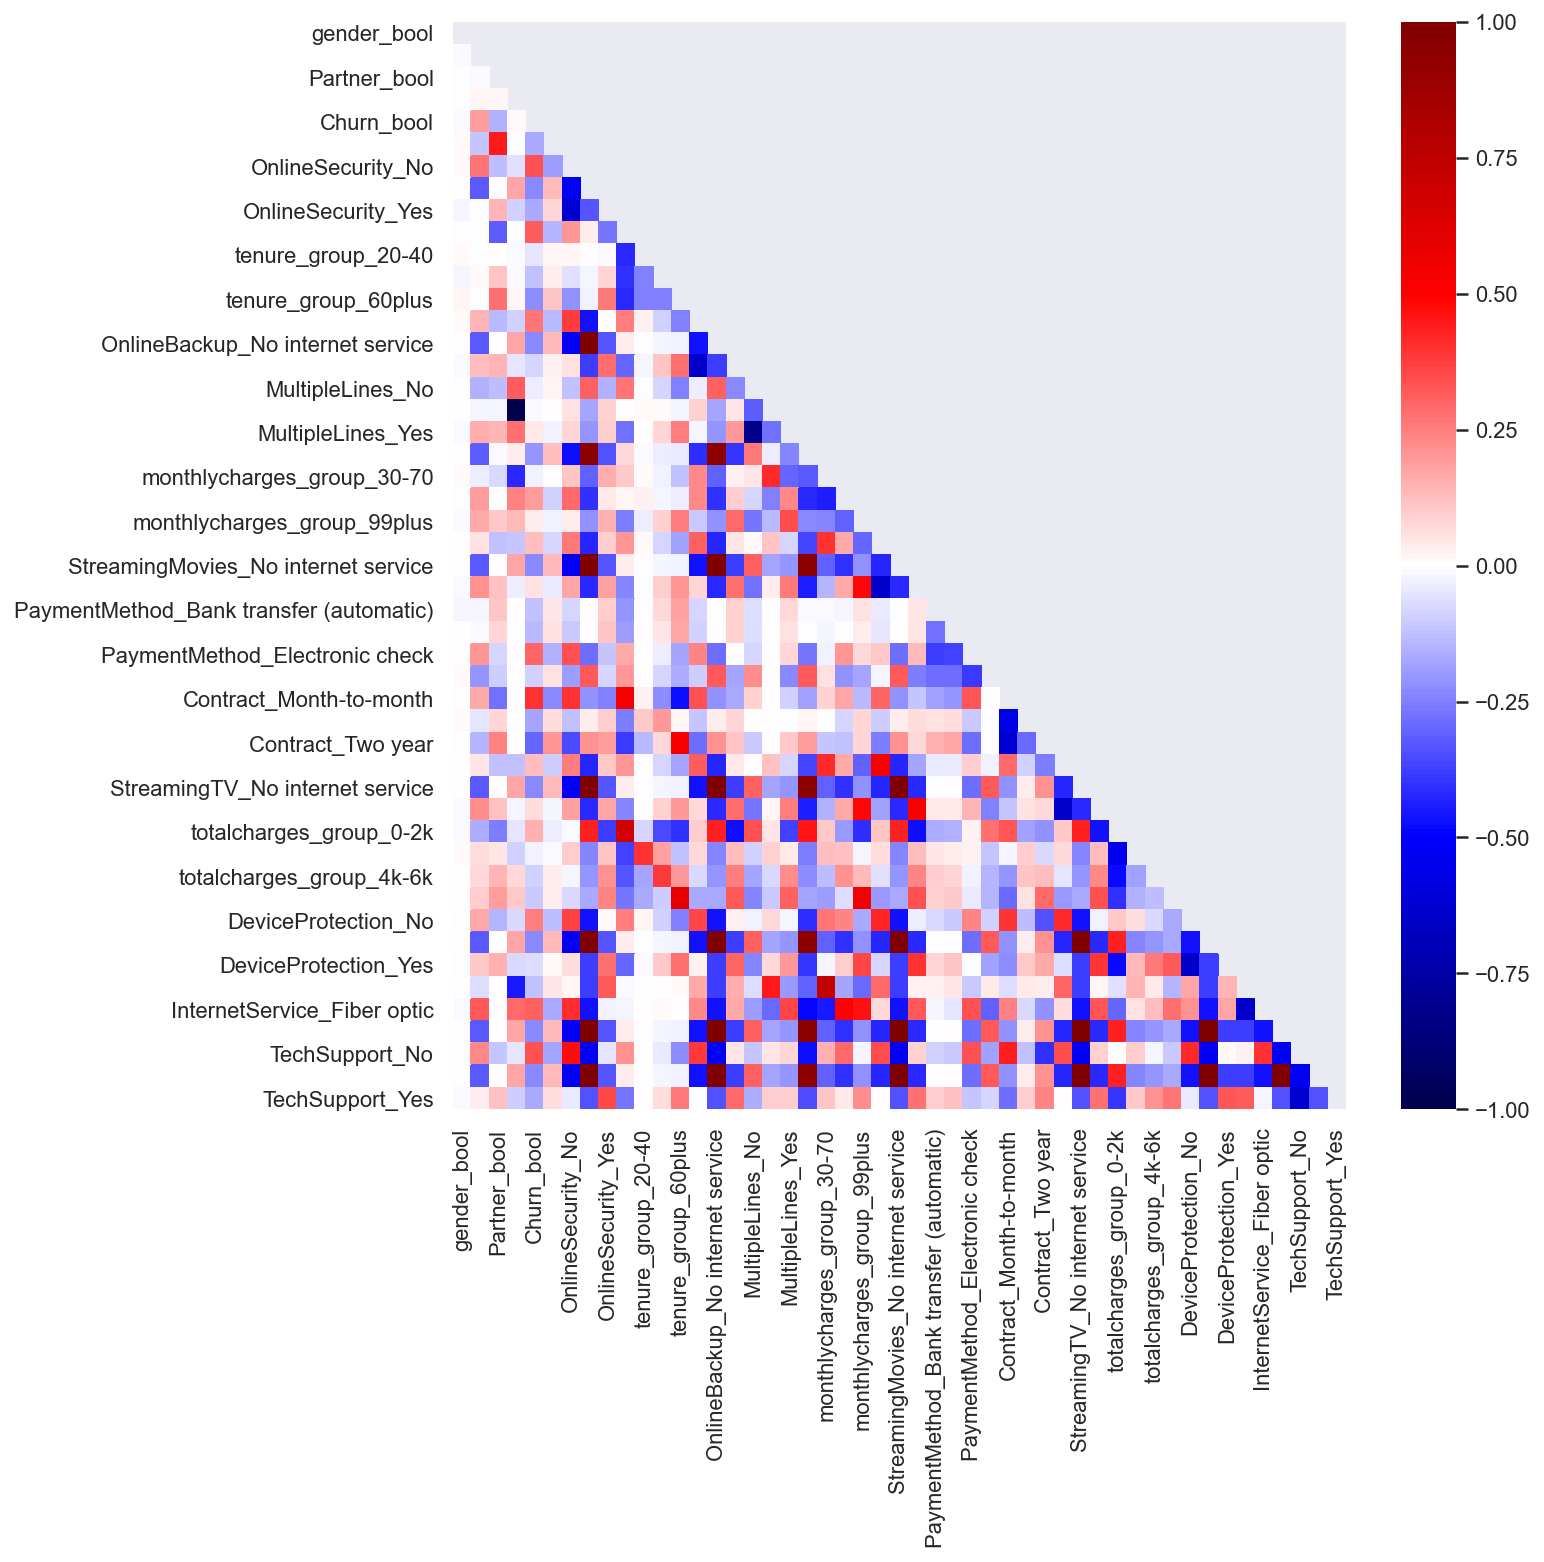

In [50]:
corr = df_feature.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap="seismic", vmin=-1, vmax=1, mask=mask)

In [51]:
feature_cols = df_feature.columns.tolist()
# for ncol in num_cols:
#     feature_cols.remove(ncol)

# feature_cols
feature_cols.sort()

In [52]:
df_feature = df_feature[feature_cols]
df_feature.head(2)

,Churn_bool,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_bool,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaperlessBilling_bool,Partner_bool,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_bool,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,customerID,gender_bool,monthlycharges_group_0-30,monthlycharges_group_30-70,monthlycharges_group_70-99,monthlycharges_group_99plus,tenure_group_0-20,tenure_group_20-40,tenure_group_40-60,tenure_group_60plus,totalcharges_group_0-2k,totalcharges_group_2k-4k,totalcharges_group_4k-6k,totalcharges_group_6kplus
0,False,1,0,0,False,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,True,True,0,0,1,0,False,1,0,0,1,0,0,1,0,0,7590-VHVEG,False,1,0,0,0,1,0,0,0,1,0,0,0
1,False,0,1,0,False,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,False,False,0,0,0,1,True,1,0,0,1,0,0,1,0,0,5575-GNVDE,True,0,1,0,0,0,1,0,0,1,0,0,0


In [53]:
# csv 파일로 저장합니다.
df_feature.to_csv("data/telco_feature.csv", index=False)

In [54]:
# 제대로 저장되었는지 확인합니다.
pd.read_csv("data/telco_feature.csv")

,Churn_bool,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_bool,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaperlessBilling_bool,Partner_bool,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_bool,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,customerID,gender_bool,monthlycharges_group_0-30,monthlycharges_group_30-70,monthlycharges_group_70-99,monthlycharges_group_99plus,tenure_group_0-20,tenure_group_20-40,tenure_group_40-60,tenure_group_60plus,totalcharges_group_0-2k,totalcharges_group_2k-4k,totalcharges_group_4k-6k,totalcharges_group_6kplus
0,False,1,0,0,False,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,True,True,0,0,1,0,False,1,0,0,1,0,0,1,0,0,7590-VHVEG,False,1,0,0,0,1,0,0,0,1,0,0,0
1,False,0,1,0,False,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,False,False,0,0,0,1,True,1,0,0,1,0,0,1,0,0,5575-GNVDE,True,0,1,0,0,0,1,0,0,1,0,0,0
2,True,1,0,0,False,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,True,False,0,0,0,1,True,1,0,0,1,0,0,1,0,0,3668-QPYBK,True,0,1,0,0,1,0,0,0,1,0,0,0
3,False,0,1,0,False,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,False,False,1,0,0,0,False,1,0,0,1,0,0,0,0,1,7795-CFOCW,True,0,1,0,0,0,0,1,0,1,0,0,0
4,True,1,0,0,False,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,True,False,0,0,1,0,True,1,0,0,1,0,0,1,0,0,9237-HQITU,False,0,0,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,0,1,0,True,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,True,True,0,0,0,1,True,0,0,1,0,0,1,0,0,1,6840-RESVB,True,0,0,1,0,0,1,0,0,1,0,0,0
7039,False,0,1,0,True,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,True,True,0,1,0,0,True,0,0,1,0,0,1,1,0,0,2234-XADUH,False,0,0,0,1,0,0,0,1,0,0,0,1
7040,False,1,0,0,True,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,True,True,0,0,1,0,False,1,0,0,1,0,0,1,0,0,4801-JZAZL,False,1,0,0,0,1,0,0,0,1,0,0,0
7041,True,1,0,0,False,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,True,True,0,0,0,1,True,1,0,0,1,0,0,1,0,0,8361-LTMKD,True,0,0,1,0,1,0,0,0,1,0,0,0
